# 2016-2017 road traffic data from select london locations

days with *any* missing points have been removed.
data is in 15 minute intervals.

In [35]:
suppressMessages(library(zoo))

In [36]:
x <- read.csv("../data/highways_england/4093.csv.xz")

In [37]:
head(x)

site_name,report_date,time_period_end,interval,len_0_520_cm,len_521_660_cm,len_661_1160_cm,len_1160_plus_cm,speed_0_10_mph,speed_11_15_mph,⋯,speed_36_40_mph,speed_41_45_mph,speed_46_50_mph,speed_51_55_mph,speed_56_60_mph,speed_61_70_mph,speed_71_80_mph,speed_80_plus_mph,speed_avg_mph,total_vol
M1/2248A,2015-08-01T00:00:00,00:14:00,0,286,6,11,7,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,68,310
M1/2248A,2015-08-01T00:00:00,00:29:00,1,235,7,8,4,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,72,254
M1/2248A,2015-08-01T00:00:00,00:44:00,2,211,3,13,4,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,70,231
M1/2248A,2015-08-01T00:00:00,00:59:00,3,169,6,10,6,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,70,191
M1/2248A,2015-08-01T00:00:00,01:14:00,4,159,1,4,3,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,70,167
M1/2248A,2015-08-01T00:00:00,01:29:00,5,154,1,5,6,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,71,166


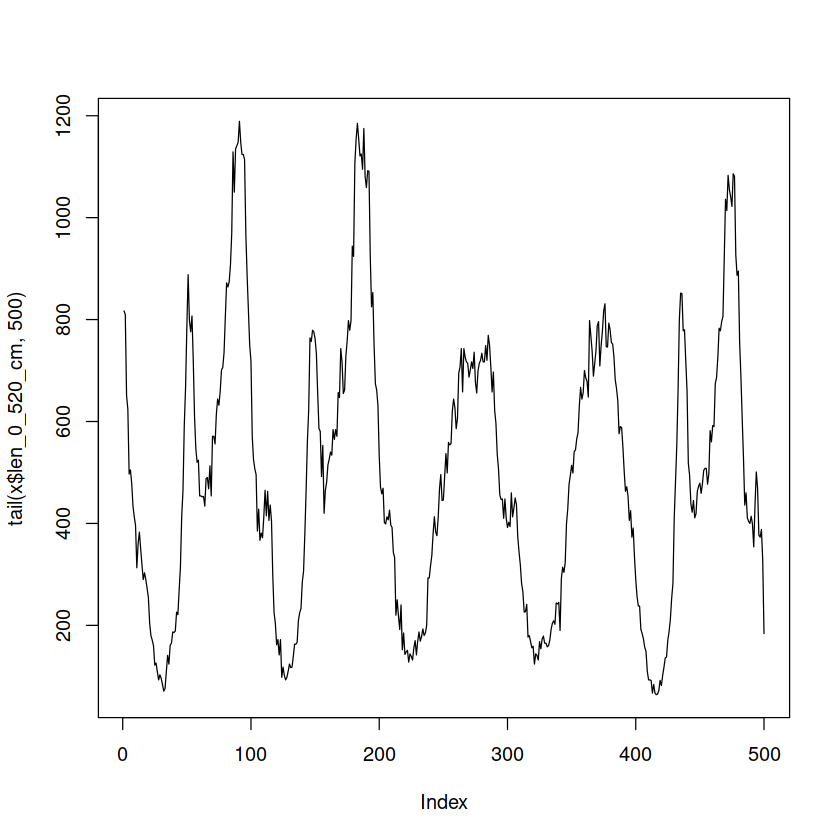

In [38]:
plot(tail(x$len_0_520_cm, 500), type="l")

In [39]:
orig.combo <- read.csv("../data/highways_england/combo.csv")

In [40]:
summary(orig.combo)

   site_name                    report_date      time_period_end   
 6005/1 :  91388   2015-10-25T00:00:00:   2000   02:14:00:  18303  
 6005/2 :  91388   2016-10-30T00:00:00:   2000   04:14:00:  18300  
 6006/1 :  91388   2017-10-29T00:00:00:   2000   22:59:00:  18296  
 6006/2 :  91388   2016-06-30T00:00:00:   1932   04:59:00:  18294  
 6047/1 :  91388   2015-08-01T00:00:00:   1920   02:29:00:  18290  
 6047/2 :  91388   2015-08-07T00:00:00:   1920   01:59:00:  18288  
 (Other):1258728   (Other)            :1795284   (Other) :1697285  
    interval     len_0_520_cm    len_521_660_cm   len_661_1160_cm 
 Min.   : 0.0   Min.   :   0.0   Min.   :  0.00   Min.   :  0.00  
 1st Qu.:24.0   1st Qu.:  61.0   1st Qu.:  3.00   1st Qu.:  2.00  
 Median :48.0   Median : 165.0   Median : 12.00   Median :  6.00  
 Mean   :47.5   Mean   : 259.6   Mean   : 27.72   Mean   : 12.59  
 3rd Qu.:72.0   3rd Qu.: 412.0   3rd Qu.: 35.00   3rd Qu.: 16.00  
 Max.   :95.0   Max.   :1530.0   Max.   :377.00   Max.

In [41]:
orig.combo <- orig.combo[, c("site_name", "report_date", "time_period_end", "interval", "speed_avg_mph", "len_0_520_cm", "total_vol")]

In [42]:
head(orig.combo)

site_name,report_date,time_period_end,interval,speed_avg_mph,len_0_520_cm,total_vol
M1/2116B,2016-06-30T00:00:00,23:14:00,0,50,73,131
M1/2116B,2016-06-30T00:00:00,23:29:00,1,49,70,112
M1/2116B,2016-06-30T00:00:00,23:44:00,2,48,68,114
M1/2116B,2016-06-30T00:00:00,23:59:00,3,51,55,97
M1/2116B,2016-07-01T00:00:00,00:14:00,4,50,32,64
M1/2116B,2016-07-01T00:00:00,00:29:00,5,53,55,90


In [43]:
summary(orig.combo)

   site_name                    report_date      time_period_end   
 6005/1 :  91388   2015-10-25T00:00:00:   2000   02:14:00:  18303  
 6005/2 :  91388   2016-10-30T00:00:00:   2000   04:14:00:  18300  
 6006/1 :  91388   2017-10-29T00:00:00:   2000   22:59:00:  18296  
 6006/2 :  91388   2016-06-30T00:00:00:   1932   04:59:00:  18294  
 6047/1 :  91388   2015-08-01T00:00:00:   1920   02:29:00:  18290  
 6047/2 :  91388   2015-08-07T00:00:00:   1920   01:59:00:  18288  
 (Other):1258728   (Other)            :1795284   (Other) :1697285  
    interval    speed_avg_mph     len_0_520_cm      total_vol     
 Min.   : 0.0   Min.   :  0.00   Min.   :   0.0   Min.   :   0.0  
 1st Qu.:24.0   1st Qu.: 49.00   1st Qu.:  61.0   1st Qu.:  74.0  
 Median :48.0   Median : 57.00   Median : 165.0   Median : 194.0  
 Mean   :47.5   Mean   : 55.69   Mean   : 259.6   Mean   : 306.4  
 3rd Qu.:72.0   3rd Qu.: 65.00   3rd Qu.: 412.0   3rd Qu.: 474.0  
 Max.   :95.0   Max.   :129.00   Max.   :1530.0   Max.

In [44]:
table(orig.combo$interval)


    0     1     2     3     4     5     6     7     8     9    10    11    12 
18812 18812 18812 18812 18824 18824 18824 18824 18824 18824 18824 18824 18824 
   13    14    15    16    17    18    19    20    21    22    23    24    25 
18824 18824 18824 18824 18824 18824 18824 18824 18824 18824 18824 18824 18824 
   26    27    28    29    30    31    32    33    34    35    36    37    38 
18824 18824 18824 18824 18824 18824 18824 18824 18824 18824 18824 18824 18824 
   39    40    41    42    43    44    45    46    47    48    49    50    51 
18824 18824 18824 18824 18824 18824 18824 18824 18824 18824 18824 18824 18824 
   52    53    54    55    56    57    58    59    60    61    62    63    64 
18824 18824 18824 18824 18824 18824 18824 18824 18824 18824 18824 18824 18824 
   65    66    67    68    69    70    71    72    73    74    75    76    77 
18824 18824 18824 18824 18824 18824 18824 18824 18824 18824 18824 18824 18824 
   78    79    80    81    82    83    84    85    

In [45]:
head(sub("-.*", "", orig.combo$report_date))

[1] "2016" "2016" "2016" "2016" "2016" "2016"

In [46]:
orig.combo$report_date <- as.Date(orig.combo$report_date)

In [47]:
head(format(orig.combo$report_date, "%Y"))

[1] "2016" "2016" "2016" "2016" "2016" "2016"

In [48]:
all.speed <- data.frame(speed=with(orig.combo, tapply(speed_avg_mph, interval, function(x) mean(x, na.rm = T))))
all.total <- data.frame(total=with(orig.combo, tapply(len_0_520_cm, interval, function(x) mean(x, na.rm = T))))
all.speed.2016 <- data.frame(speed=with(orig.combo[format(orig.combo$report_date, "%Y") == "2016", ], tapply(speed_avg_mph, interval, function(x) mean(x, na.rm = T))))
all.speed.2017 <- data.frame(speed=with(orig.combo[format(orig.combo$report_date, "%Y") == "2017", ], tapply(speed_avg_mph, interval, function(x) mean(x, na.rm = T))))
all.total.2016 <- data.frame(total=with(orig.combo[format(orig.combo$report_date, "%Y") == "2016", ], tapply(len_0_520_cm, interval, function(x) mean(x, na.rm = T))))
all.total.2017 <- data.frame(total=with(orig.combo[format(orig.combo$report_date, "%Y") == "2017", ], tapply(len_0_520_cm, interval, function(x) mean(x, na.rm = T))))                                                                                                              

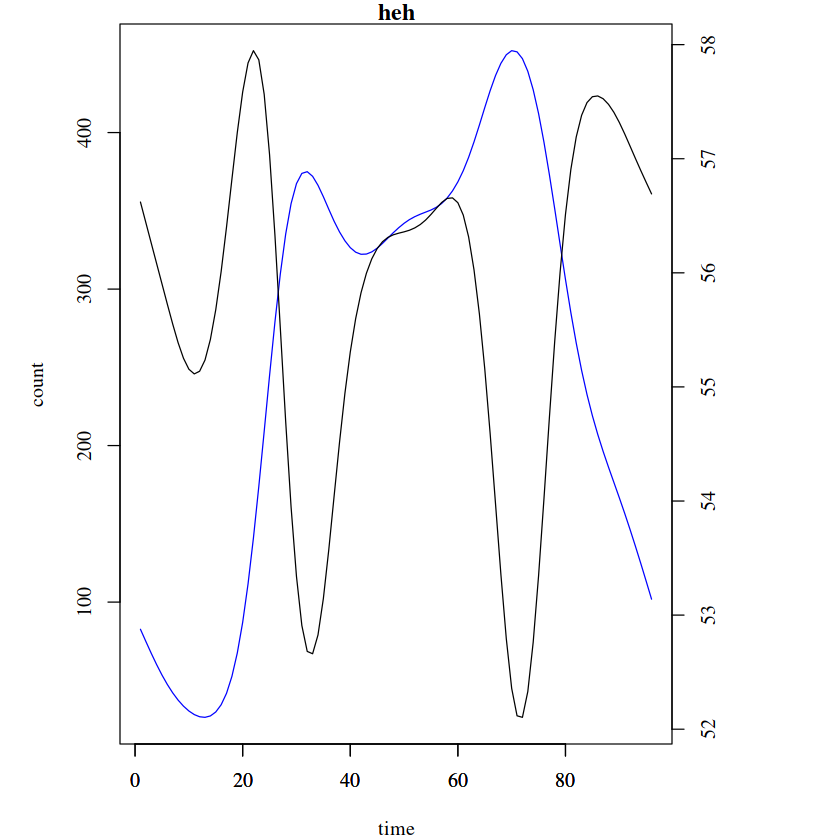

In [49]:
plot.cross_section <- function(total, speed, title="") {
  par(mar=c(4,5,1,7), family = "serif")
  plot(smooth.spline(as.vector(unlist(total)), df=16), type="l", col="blue", main=title, xlab="time", ylab="count")
  par(new=T)
  plot(smooth.spline(as.vector(unlist(speed)), df=16), type="l", yaxt="n", ylab=NA, xlab=NA, bty="n")
  axis(side=4)
}

plot.cross_section(all.total, all.speed, "heh")

In [50]:
unique(format(orig.combo$report_date, "%Y-%m"))

[1] "2016-06" "2016-07" "2015-08" "2015-09" "2015-10" "2015-11" "2015-12"
 [8] "2016-01" "2016-02" "2016-03" "2016-04" "2016-05" "2016-08" "2016-09"
[15] "2016-10" "2016-11" "2016-12" "2017-01" "2017-02" "2017-03" "2017-04"
[22] "2017-05" "2017-06" "2017-07" "2017-08" "2017-09" "2017-10" "2017-11"
[29] "2017-12" "2018-01" "2018-02" "2018-03" "2018-04"

In [51]:
month.keys <- paste0(c(rep("2016-", 12), rep("2017-", 12)), sprintf("%02d", 1:12))
month.keys

[1] "2016-01" "2016-02" "2016-03" "2016-04" "2016-05" "2016-06" "2016-07"
 [8] "2016-08" "2016-09" "2016-10" "2016-11" "2016-12" "2017-01" "2017-02"
[15] "2017-03" "2017-04" "2017-05" "2017-06" "2017-07" "2017-08" "2017-09"
[22] "2017-10" "2017-11" "2017-12"

In [52]:
#par(mfrow=c(8,3), mar=c(0,0,0,0), family = "serif")
for(month.key in month.keys) {
  png(paste0("/tmp/", month.key, ".png"))
  total <- data.frame(total=with(orig.combo[format(orig.combo$report_date, "%Y-%m") == month.key, ], tapply(len_0_520_cm, interval, function(x) mean(x, na.rm = T))))
  speed <- data.frame(speed=with(orig.combo[format(orig.combo$report_date, "%Y-%m") == month.key, ], tapply(speed_avg_mph, interval, function(x) mean(x, na.rm = T))))
  plot.cross_section(total, speed, month.key)
  dev.off()
}

then `convert *.png -set delay 1x10 -loop 0 traffic.gif` for animation...

In [53]:
tail(orig.combo[orig.combo$report_date == as.Date("2017-08-02"), ])

,site_name,report_date,time_period_end,interval,speed_avg_mph,len_0_520_cm,total_vol
1781419,6179/1,2017-08-02,22:44:00,90,56,73,78
1781420,6179/1,2017-08-02,22:59:00,91,55,59,66
1781421,6179/1,2017-08-02,23:14:00,92,57,53,58
1781422,6179/1,2017-08-02,23:29:00,93,55,45,47
1781423,6179/1,2017-08-02,23:44:00,94,55,46,48
1781424,6179/1,2017-08-02,23:59:00,95,56,33,33


In [54]:
speed <- with(orig.combo, tapply(speed_avg_mph, list(report_date, interval), function(x) round(mean(x, na.rm = T), 2)))
total <- with(orig.combo, tapply(len_0_520_cm,  list(report_date, interval), function(x) round(mean(x, na.rm = T), 2)))

In [55]:
index.dates <- as.Date(rownames(speed))
speed <- speed[index.dates >= as.Date("2016-01-01") & index.dates <= as.Date("2017-12-31"), ]
total <- total[index.dates >= as.Date("2016-01-01") & index.dates <= as.Date("2017-12-31"), ]
head(total)

,0,1,2,3,4,5,6,7,8,9,⋯,86,87,88,89,90,91,92,93,94,95
2016-01-01,39.75,64.20,106.00,127.65,149.20,167.25,164.25,148.10,131.30,115.80,⋯,153.40,145.40,142.80,132.70,123.10,115.25,106.65,96.55,87.00,73.50
2016-01-02,67.20,54.70,51.50,42.25,39.15,36.90,29.95,24.80,22.55,22.25,⋯,188.10,179.25,182.00,183.45,166.15,161.95,149.95,140.05,126.50,114.75
2016-01-03,102.80,94.65,83.15,67.50,63.45,55.65,47.30,42.05,40.00,34.70,⋯,182.47,171.05,162.89,153.74,144.79,129.16,110.63,107.53,86.26,75.74
2016-01-04,67.05,55.47,50.95,40.95,32.63,29.26,28.79,23.63,22.68,23.63,⋯,158.35,144.15,132.60,129.45,112.45,97.70,91.65,81.30,66.35,53.70
2016-01-05,48.35,45.35,36.55,30.90,26.95,26.85,24.15,21.10,19.20,18.05,⋯,157.90,151.25,140.15,137.35,117.20,98.45,91.30,84.90,69.15,56.85
2016-01-06,54.35,44.25,35.70,33.75,28.40,27.35,22.40,22.20,18.60,18.50,⋯,160.35,149.75,142.80,132.60,120.95,102.80,93.50,85.60,68.50,56.95


In [56]:
table(diff(as.Date(rownames(total))))


  1   2   3   4   6 
683   7   3   3   2 

In [57]:
nrow(total)

[1] 699

In [58]:
#total <- apply(total, 2, na.locf)
#speed <- apply(speed, 2, na.locf)
#all(!is.na(speed)) && all(!is.na(total))

In [59]:
# just delete any row with a missing value.
total <- total[apply(total, 1, function(x) all(!is.na(x))), ]
speed <- speed[apply(speed, 1, function(x) all(!is.na(x))), ]
nrow(total)
nrow(speed)

[1] 668

[1] 668

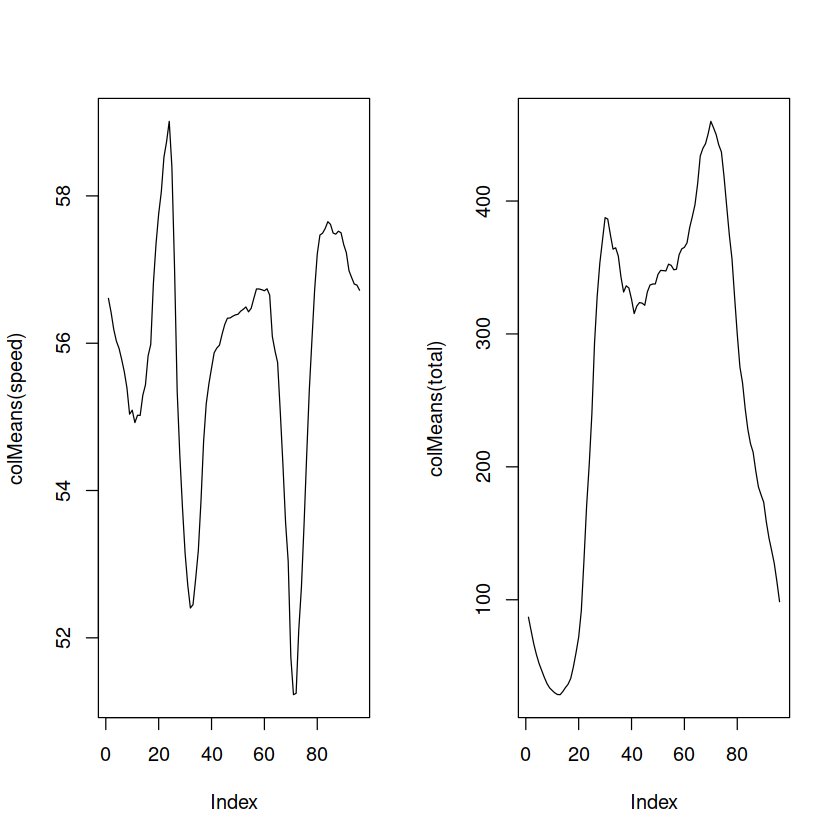

In [60]:
par(mfrow = c(1, 2))
plot(colMeans(speed), type = "l")
plot(colMeans(total), type = "l")

In [61]:
write.csv(total, "../data/highways_england/count_2016-2017.csv")

In [62]:
write.csv(speed, "../data/highways_england/speed_2016-2017.csv")

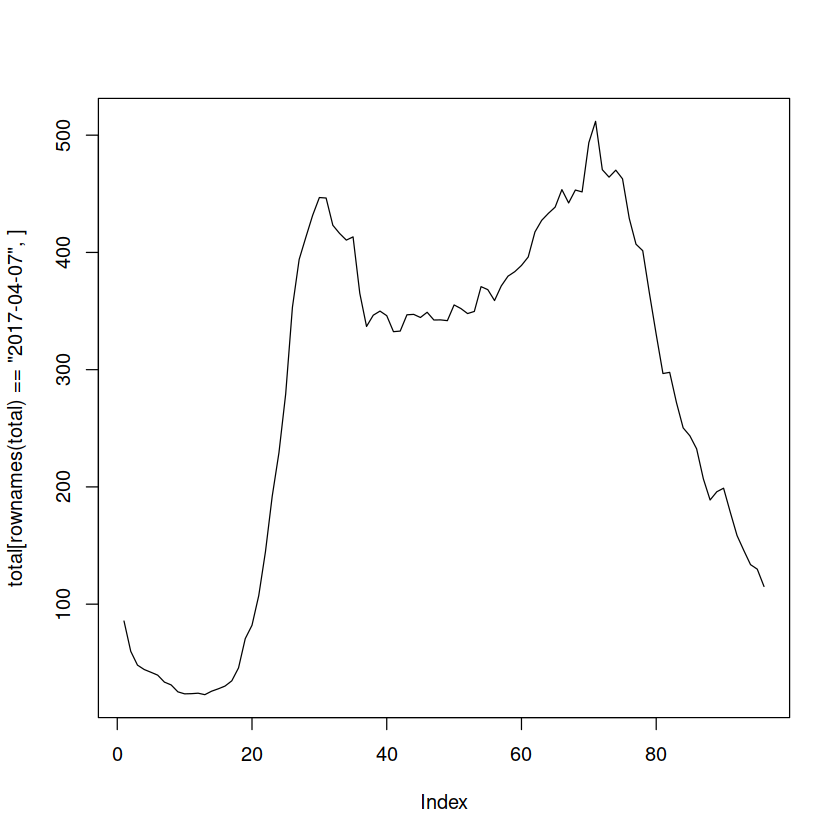

In [72]:
plot(total[rownames(total) == "2017-04-07", ], type="l")